## Oppgave 1 - Del 1 (2 poeng)

## Oppgave 2 - Del 1 (2 poeng)

## Oppgave 3 - Del 1 (2 poeng)

## Oppgave 4 - Del 1 (4 poeng)

## Oppgave 1 - Del 2 (6 poeng)

## Oppgave 2 - Del 2 (4 poeng)

## Oppgave 3 - Del 2 (4 poeng)

## Oppgave 4 - Del 2 (6 poeng)

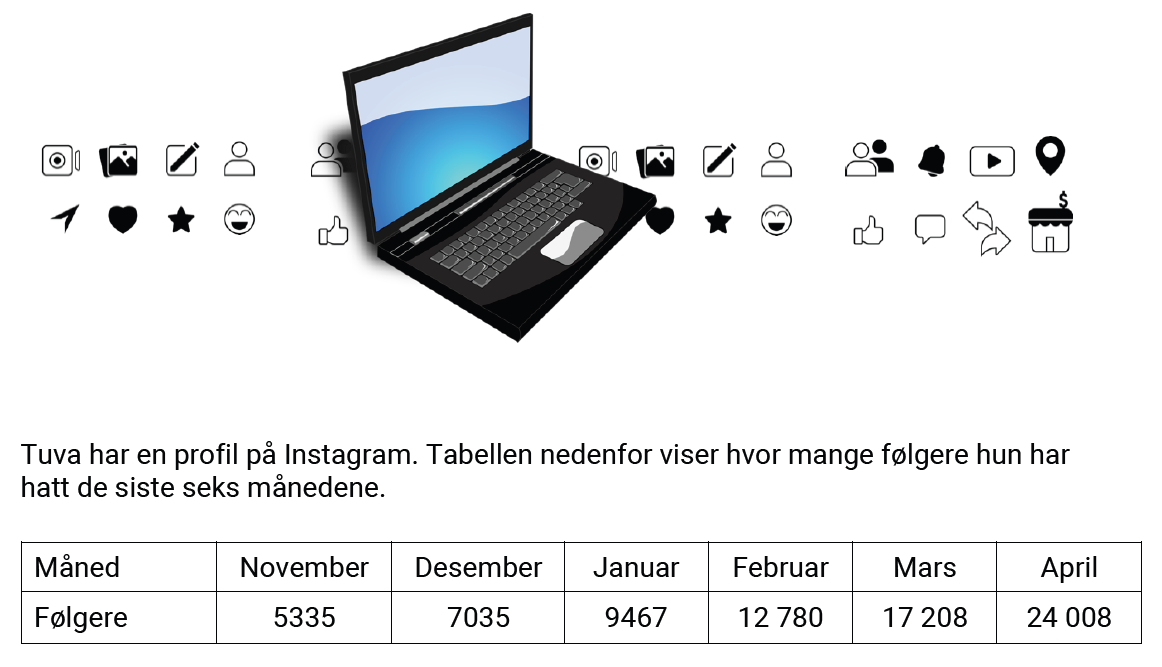

Tuva har laget en modell som viser at antallet følgere har økt med ca. 35 % hver
måned i perioden november 2023–april 2024.

a) La være antall måneder etter november 2023, og vis hvordan Tuva kan ha laget
denne modellen.

For å få antall følgere til å øke raskere vil Tuva gjøre noen endringer i innholdet hun
legger ut. Hun har som mål at økningen i antall følgere ikke skal fortsette å være på
35 % etter april 2024, men øke med 5 prosentpoeng hver måned.

b) Vis at antall følgere vil være 33 611 i mai og 48 736 i juni dersom Tuva klarer å nå
målet sitt for disse månedene.

c) Hvor mange prosent flere følgere vil Tuva ha i august 2024 dersom hun klarer å
nå det nye målet sitt for hver måned, sammenliknet med om økningen fortsetter å
være på 35 % hver måned?

f(x) = 5118.7*1.3599**x


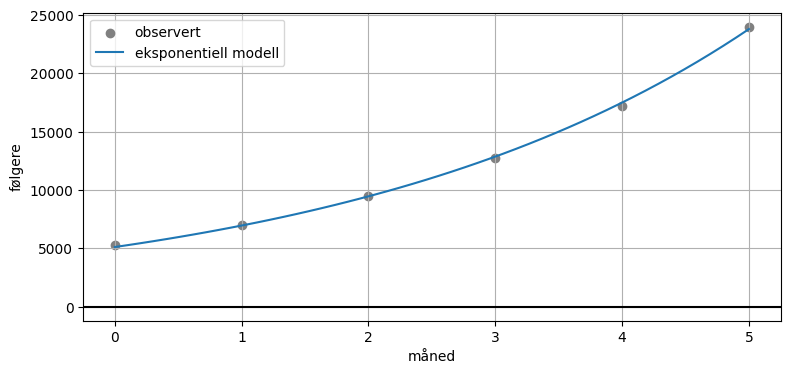

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import curve_fit
from sympy import Symbol

plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = 9, 4

Måned = np.arange(0, 6)
Følgere = np.array([5335, 7035, 9467, 12780, 17208, 24008])

def eksp(x, a, k):
    return a*k**x

parametre, kovarianser = curve_fit(eksp, Måned, Følgere, method='dogbox')

x = Symbol("x")
f = eksp(x, *parametre)
print(f'f(x) = {f.evalf(5)}')

fun = lambda x: eksp(x, *parametre)
X = np.linspace(min(Måned), max(Måned))
plt.scatter(Måned, Følgere, color="grey", label="observert")
plt.plot(X, fun(X), label="eksponentiell modell")
plt.axhline(0, color="black")
plt.legend()
plt.xlabel("måned")
plt.ylabel("følgere")
plt.show()

In [29]:
a, k = parametre
vekst = k - 1

print(f'1a) Tuva har en gjennomsnittlig prosentvis månedlig vekst på {vekst:.1%}. Modellen hennes viser at antallet følgere på Instagram har økt med {vekst:.1%} hver måned i perioden november 2023–april 2024.')

1a) Tuva har en gjennomsnittlig prosentvis månedlig vekst på 36.0%. Modellen hennes viser at antallet følgere på Instagram har økt med 36.0% hver måned i perioden november 2023–april 2024.


In [23]:
# Lar nå april være startmåneden.

startfølgere = Følgere[5]
startendring = 35/100

endringsvekst = 5/100
Mål = startendring + np.arange(1, 3)*endringsvekst
Vekstfaktor = 1 + Mål
Framtidsfølgere = startfølgere*Vekstfaktor.cumprod()
 
print(f'1b) Tuva vil ha {Framtidsfølgere[0]:.0f} følgere på Instagram i mai og {Framtidsfølgere[1]:.0f} følgere på Instagram i juni.')

1b) Tuva vil ha 33611 følgere på Instagram i mai og 48736 følgere på Instagram i juni.


In [30]:
import numpy as np

# Definerer antall perioder (mai, juni, juli, august)
perioder = 4

# Beregner mål og vekstfaktor
Mål = startendring + np.arange(1, perioder + 1) * endringsvekst
Vekstfaktor = 1 + Mål

# Beregner framtidsfølgere med økt prosentvis vekst
Framtidsfølgere = startfølgere * Vekstfaktor.cumprod()

# Beregner framtidsfølgere med konstant prosentvis vekst
Konstantfølgere = startfølgere * (1 + startendring) ** np.arange(1, perioder + 1)

# Beregner økningen i følgere
økning = Framtidsfølgere[-1] / Konstantfølgere[-1] - 1
print(f'1c) Tuva vil ha {økning:.1%} flere følgere på Instagram i august 2024 dersom hun klarer å nå det nye målet sitt med 5 prosentpoeng økning for hver måned, sammenliknet med en økning på 35 % hver måned.')

1c) Tuva vil ha 42.1% flere følgere på Instagram i august 2024 dersom hun klarer å nå det nye målet sitt med 5 prosentpoeng økning for hver måned, sammenliknet med en økning på 35 % hver måned.


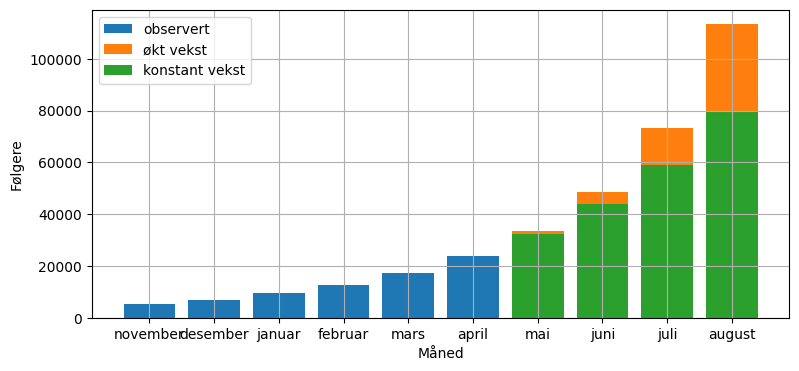

In [31]:
Månedsnavn = ["november", "desember", "januar", "februar", "mars",
              "april", "mai", "juni", "juli", "august"]
Månedsnummer = range(len(Månedsnavn))
 
plt.bar(Måned, Følgere, label="observert")
plt.bar(np.arange(6, 6 + perioder), Framtidsfølgere, label="økt vekst")
plt.bar(np.arange(6, 6 + perioder), Konstantfølgere,
        label="konstant vekst")
plt.xticks(Månedsnummer, Månedsnavn)
plt.xlabel("Måned")
plt.ylabel("Følgere")
plt.legend()
plt.show()

## Oppgave 5 - Del 2 (4 poeng)

Oda har undersøkt hvor mange minutter elevene ved skolen brukte på lekser en
ettermiddag i mai, og laget histogrammet nedenfor.

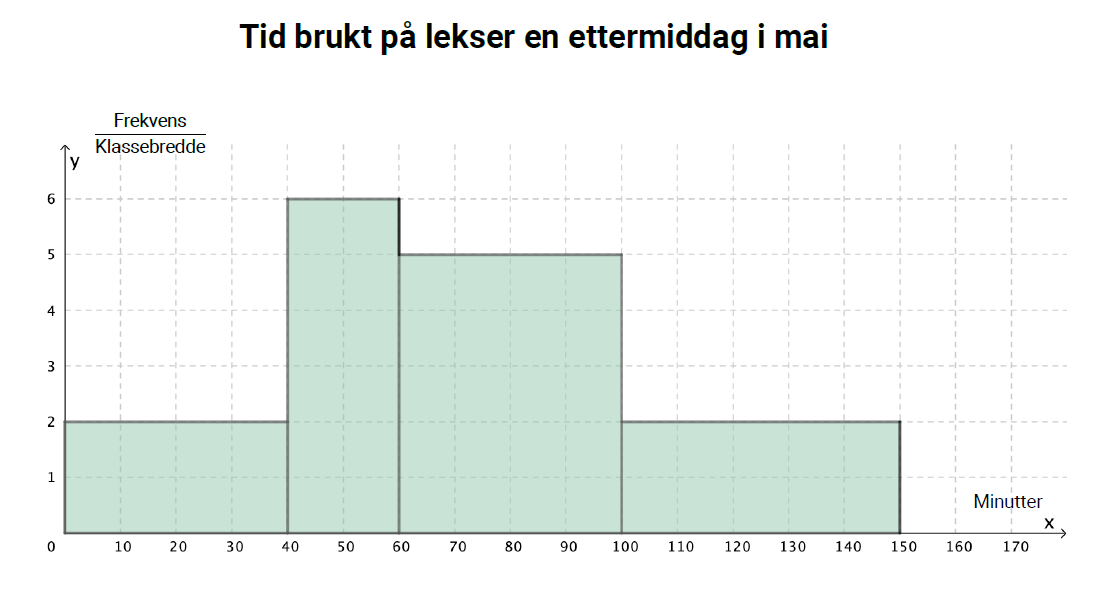

Bruk opplysningene du kan lese ut av histogrammet, gjør beregninger, og argumenter
for at hver av de fire påstandene nedenfor kan være riktig.

Påstand 1
80 elever brukte mindre enn 40 minutter på lekser denne ettermiddagen.

Påstand 2
Den relative frekvensen for 100–150 minutter brukt på lekser er 1/5.

Påstand 3
Elevene som brukte mindre enn 60 minutter på leksene,
brukte i gjennomsnitt 38 minutter.

Påstand 4
For elevene som brukte mindre enn 60 minutter på leksene, er medianen for antall
minutter høyere enn gjennomsnittet for antall minutter.

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = 9, 4

klassegrenser = np.array([0, 40, 60, 100, 150])
midtpunkt = (klassegrenser[:-1] + klassegrenser[1:]) / 2
bredder = np.diff(klassegrenser)
høyder = np.array([2, 6, 5, 2])
frekvenser = bredder * høyder
relativ = frekvenser / frekvenser.sum()  # relativ frekvens
kumulativ = frekvenser.cumsum()  # kumulativ frekvens

ftab = pd.DataFrame({
    "nedre klassegrense": klassegrenser[:-1],
    "øvre klassegrense": klassegrenser[1:],
    "frekvens": frekvenser,
    "relativ frekvens": relativ,
    "kumulativ frekvens": kumulativ,
    "intervallbredde": bredder,
})
print(ftab)

påstått_antall = 80
makstid = 40

antall = ftab[ftab["øvre klassegrense"] <= makstid]["frekvens"].sum()
print(antall)

påstand1 = antall >= påstått_antall
print(f'3) Påstand 1: {påstand1} - 80 elever brukte mindre enn 40 minutter på lekser denne ettermiddagen.')

påstått_relfrek = 1 / 5
øvre = 150

relfrek = ftab[ftab["øvre klassegrense"] == øvre]["relativ frekvens"].sum()
print(relfrek)

påstand2 = relfrek == påstått_relfrek
print(f'3) Påstand 2: {påstand2} - Den relative frekvensen for 100–150 minutter brukt på lekser er 1/5.')

# Oppdatering av makstid og påstått gjennomsnitt
makstid = 60
påstått_gjennomsnitt = 38

# Beregning av klassemidtpunkt og totaltid
ftab['klassemidtpunkt'] = ftab[['nedre klassegrense', 'øvre klassegrense']].mean(axis=1)
ftab['totaltid'] = ftab['frekvens'] * ftab['klassemidtpunkt']

print(ftab)

# Legger til den nye koden
nedre_klassegrense = ftab[ftab["øvre klassegrense"] <= makstid]
print(nedre_klassegrense)

antall = nedre_klassegrense['frekvens'].sum()
print(antall)

total = nedre_klassegrense['totaltid'].sum()
print(total)

gjennomsnitt = total / antall
print(gjennomsnitt)

påstand3 = gjennomsnitt == påstått_gjennomsnitt
print(f'3) Påstand 3: {påstand3} - Elevene som brukte mindre enn 60 minutter på leksene, brukte i gjennomsnitt 38 minutter.')

# Beregning av median
pos = antall / 2
print(pos)
klasse = nedre_klassegrense[nedre_klassegrense["kumulativ frekvens"] > pos].iloc[0]
print(klasse)
klassepos = pos - (klasse["kumulativ frekvens"] - klasse["frekvens"])
print(klassepos)
median = (klassepos / klasse["frekvens"]) * klasse["intervallbredde"] + klasse["nedre klassegrense"]
print(median)
påstand4 = median > gjennomsnitt
print(f'3) Påstand 4: {påstand4} For elevene som brukte mindre enn 60 minutter på leksene, er medianen for antall minutter høyere enn gjennomsnittet.')

   nedre klassegrense  øvre klassegrense  frekvens  relativ frekvens  \
0                   0                 40        80              0.16   
1                  40                 60       120              0.24   
2                  60                100       200              0.40   
3                 100                150       100              0.20   

   kumulativ frekvens  intervallbredde  
0                  80               40  
1                 200               20  
2                 400               40  
3                 500               50  
80
3) Påstand 1: True - 80 elever brukte mindre enn 40 minutter på lekser denne ettermiddagen.
0.2
3) Påstand 2: True - Den relative frekvensen for 100–150 minutter brukt på lekser er 1/5.
   nedre klassegrense  øvre klassegrense  frekvens  relativ frekvens  \
0                   0                 40        80              0.16   
1                  40                 60       120              0.24   
2                  60        

## Oppgave 6 - Del 2 (2 poeng)

## Oppgave 7 - Del 2 (4 poeng)